![SegmentLocal](images/KC_simplemap_Oct2013.jpg "segment")

# Reality List Price Analysis

**Authors**: Rachel Fein

## Overview

This analysis and linear regression modeling was performed with the intent to give recommendations to the King County Realty Team on how to estimate a list price based on basic key characteristics of their client's home. Modeling was performed on real residential real estate sales data in King County and interpreted to give a dollar amount per investigated characteristic. The characteristics in the final model were grade, view, living sqft, year built, and floors.

Interpretation of the regression model led to the following findings:
    
- The coefficients for the respective grade, view, living sqft, yr built, and floors of the home can be used to adequately adjust the list price
- The final model had an R-square value of 0.615 this model should be strictly used alongside with personal judgment of the agents.
 
To use this model as it is intended I recommend that King County Realty use the coefficient values of each associated characteristic that make up this model (view, grade, number of floors, sqft living, and year built) to build a list price estimate to help them decide on a list price for their clients home. 

Doing so will allow your realtors to use data backed research to aid in pricing their client's homes, instead of only using their personal opinions. 

## Business Problem

The King County Realty Team wants to focus on setting a more accurate list price for their seller clients. This analysis has given the real estate agency a way to set a list price based on data for specific characteristics: grade, view, living sqft, yr built, and floors. These characteristics were chosen based on using data that best fits the regression model to insure the model would compute the best results with minimal error. The goal is, this information will allow the agents to give their clients a more legitimate estimate on the value of their home.



## Data

The data used for this project was from the King County Dataset, a dataset of actualy real estate data from King County Washington. The data frame is called "kc_house_data" and it contains 21597 rows and 21 columns. The columns used in this analysis were `price`, `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, `waterfront`, `view`, `condition`, `grade`, `sqft_above`, `sqft_basement`, `yr_built`, `yr_renovated`, `basement_yes_no`, `yr_renovated_ob`. With 'price' being the target variable. Each of the 21597 rows represents a house sold in the county.



# Obtain Data

In [1]:
# Import libraries that will be helpful
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

# Import data
data = pd.read_csv('data/kc_house_data.csv')

In [2]:
# Inspect data
# dtype objects will need to be preprocessed
# NULL: waterfront, view, yr_renovated
# COLUMNS NOT NEEDED FOR ANALYSIS: date, sqft_lot15, sqft_living15, LAT, LONG, ZIPCODE, ID
# OBJECTS: waterfront, view, condition, grade, sqft_basement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
# inspect data
# we see that some object columns are categorical and need to be dealt with
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# start with dropping columns I know wont help to answer business question
# dropped sqft_living15 & sqftlot_15 because the data is not typically information a person would
# have on their property. Date, lat, long, zipcode could be proven useful in further investigation
data.drop(['date', 'sqft_lot15', 'sqft_living15', 'lat', 'long', 'zipcode', 'id'],axis=1,inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0


In [5]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [6]:
# try to find out why sqft_basement is in object form
data['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [7]:
# it seems that sqft_basement is zero inflated. Meaning that 0.0 is being used to count for no
# basement.
# I am going to make this categorical with two options: 'yes' or 'no' to having a basement 
# if this has a negative effect on the model I will drop this category later
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
666.0         1
1990.0        1
295.0         1
1913.0        1
207.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [8]:
# Use lambda and add it as new column it its own data frame so I can compare the changes
data['basement_yes_no'] = data['sqft_basement'].map(lambda x: 'NO' if x == '0.0' else 'YES')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21597 non-null  float64
 1   bedrooms         21597 non-null  int64  
 2   bathrooms        21597 non-null  float64
 3   sqft_living      21597 non-null  int64  
 4   sqft_lot         21597 non-null  int64  
 5   floors           21597 non-null  float64
 6   waterfront       19221 non-null  object 
 7   view             21534 non-null  object 
 8   condition        21597 non-null  object 
 9   grade            21597 non-null  object 
 10  sqft_above       21597 non-null  int64  
 11  sqft_basement    21597 non-null  object 
 12  yr_built         21597 non-null  int64  
 13  yr_renovated     17755 non-null  float64
 14  basement_yes_no  21597 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 2.5+ MB


<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

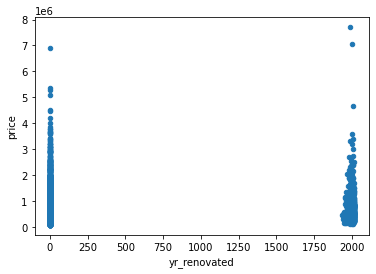

In [9]:
# see what the relationship between yr_renovated and price is
# we see this data is also 0.0 inflated. I am choosing to make this categorical data 
# see houses renovated a long time ago are not relevant
# and 0.0 stands for not renovated 
data.plot.scatter("yr_renovated","price")

In [10]:
data['yr_renovated'].astype(object)

0           0
1        1991
2         NaN
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21597, dtype: object

In [11]:
data['yr_renovated'].fillna('unknown', inplace=True)

In [12]:
data['yr_renovated'].value_counts()

0.0        17011
unknown     3842
2014.0        73
2003.0        31
2013.0        31
           ...  
1948.0         1
1946.0         1
1944.0         1
1934.0         1
1971.0         1
Name: yr_renovated, Length: 71, dtype: int64

In [13]:
# I choose to turn yr_renovated into four columns that seemed relevant to me
data['yr_renovated_ob'] = data['yr_renovated'].map(lambda x: 'recently' if x == 2015 | 2014 | 2013 | 2012 | 2011 | 2010 
                                                       else ('in_past' if x == 2005 | 2004 | 2003 | 2002 | 2001 | 2000 
                                                             else "unknown" if x == 'unknown' 
                                                             else 'not_renovated'))
data['yr_renovated_ob'].value_counts()

not_renovated    17711
unknown           3842
in_past             30
recently            14
Name: yr_renovated_ob, dtype: int64

In [14]:
# going to make bathrooms, bedrooms, and floors categorical because they are not continuous  
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [15]:
# prep for OneHotEncoding
# fill in null values in waterfront and view with "unknown"
cat_var = data[['waterfront', 'view', 'condition', 'grade', 'yr_renovated_ob', 'basement_yes_no', 'floors', 'bedrooms', 'bathrooms']].copy()
cat_without_nan = cat_var.apply(lambda x:x.fillna('Unknown'))

In [16]:
# make astype categories
cat_cols = ['condition', 'grade', 'waterfront', 'view', 'yr_renovated_ob', 'basement_yes_no','floors', 'bedrooms', 'bathrooms']
cat_cols_series =pd.Series(cat_cols)


In [17]:
astype_cat = cat_cols_series.astype('category')
astype_cat

0          condition
1              grade
2         waterfront
3               view
4    yr_renovated_ob
5    basement_yes_no
6             floors
7           bedrooms
8          bathrooms
dtype: category
Categories (9, object): ['basement_yes_no', 'bathrooms', 'bedrooms', 'condition', ..., 'grade', 'view', 'waterfront', 'yr_renovated_ob']

In [18]:
# specify categorical columns 

cat_cols = ['condition', 'grade', 'waterfront', 'view', 'yr_renovated_ob', 'basement_yes_no', 'floors', 'bedrooms', 'bathrooms']
cat_cols_series =pd.Series(cat_cols)

In [19]:
astype_cat = cat_cols_series.astype('category')
astype_cat

0          condition
1              grade
2         waterfront
3               view
4    yr_renovated_ob
5    basement_yes_no
6             floors
7           bedrooms
8          bathrooms
dtype: category
Categories (9, object): ['basement_yes_no', 'bathrooms', 'bedrooms', 'condition', ..., 'grade', 'view', 'waterfront', 'yr_renovated_ob']

In [20]:
# turn object cols into categorical vars
# one-hot-encoding
# make sure to drop first 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

OneHotEncoder(drop='first', sparse=False)

In [21]:
# make encoded df_ohe
data_ohe = encoder.fit_transform(cat_without_nan[astype_cat])
df_ohe = pd.DataFrame(data_ohe,columns=encoder.get_feature_names(astype_cat),
                     index=data.index)

In [22]:
# need to drop original columns that we used to make categorical cols
df_model = pd.concat([data, df_ohe], axis =1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          21597 non-null  float64
 1   bedrooms                       21597 non-null  int64  
 2   bathrooms                      21597 non-null  float64
 3   sqft_living                    21597 non-null  int64  
 4   sqft_lot                       21597 non-null  int64  
 5   floors                         21597 non-null  float64
 6   waterfront                     19221 non-null  object 
 7   view                           21534 non-null  object 
 8   condition                      21597 non-null  object 
 9   grade                          21597 non-null  object 
 10  sqft_above                     21597 non-null  int64  
 11  sqft_basement                  21597 non-null  object 
 12  yr_built                       21597 non-null 

In [23]:
# dropping original columns that were used to make categorical columns
drop_cols = ['bathrooms', 'bedrooms', 'floors', 'condition', 'grade', 'waterfront', 'yr_renovated', 'view', 'yr_renovated_ob', 'sqft_basement', 'basement_yes_no']
df_model.drop(columns = drop_cols, inplace=True)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          21597 non-null  float64
 1   sqft_living                    21597 non-null  int64  
 2   sqft_lot                       21597 non-null  int64  
 3   sqft_above                     21597 non-null  int64  
 4   yr_built                       21597 non-null  int64  
 5   condition_Fair                 21597 non-null  float64
 6   condition_Good                 21597 non-null  float64
 7   condition_Poor                 21597 non-null  float64
 8   condition_Very Good            21597 non-null  float64
 9   grade_11 Excellent             21597 non-null  float64
 10  grade_12 Luxury                21597 non-null  float64
 11  grade_13 Mansion               21597 non-null  float64
 12  grade_3 Poor                   21597 non-null 

In [24]:
# rename columns that dont make sense
df_model.columns = df_model.columns.str.replace('yr_renovated_ob', 'Renovated')
df_model.columns = df_model.columns.str.replace('Renovated_not_renovated', 'not_renovated')
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21597 non-null  float64
 1   sqft_living          21597 non-null  int64  
 2   sqft_lot             21597 non-null  int64  
 3   sqft_above           21597 non-null  int64  
 4   yr_built             21597 non-null  int64  
 5   condition_Fair       21597 non-null  float64
 6   condition_Good       21597 non-null  float64
 7   condition_Poor       21597 non-null  float64
 8   condition_Very Good  21597 non-null  float64
 9   grade_11 Excellent   21597 non-null  float64
 10  grade_12 Luxury      21597 non-null  float64
 11  grade_13 Mansion     21597 non-null  float64
 12  grade_3 Poor         21597 non-null  float64
 13  grade_4 Low          21597 non-null  float64
 14  grade_5 Fair         21597 non-null  float64
 15  grade_6 Low Average  21597 non-null 

In [25]:
# we need to remove spaces and '.' to run the model. For now we leave bathrooms & floors just without the'.' and
# rename columns to a more suitable name for final model
df_model.columns = df_model.columns.str.replace(' ', '_')
df_model.columns = df_model.columns.str.replace('.', '')
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21597 non-null  float64
 1   sqft_living          21597 non-null  int64  
 2   sqft_lot             21597 non-null  int64  
 3   sqft_above           21597 non-null  int64  
 4   yr_built             21597 non-null  int64  
 5   condition_Fair       21597 non-null  float64
 6   condition_Good       21597 non-null  float64
 7   condition_Poor       21597 non-null  float64
 8   condition_Very_Good  21597 non-null  float64
 9   grade_11_Excellent   21597 non-null  float64
 10  grade_12_Luxury      21597 non-null  float64
 11  grade_13_Mansion     21597 non-null  float64
 12  grade_3_Poor         21597 non-null  float64
 13  grade_4_Low          21597 non-null  float64
 14  grade_5_Fair         21597 non-null  float64
 15  grade_6_Low_Average  21597 non-null 

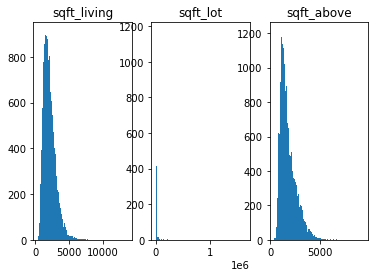

In [26]:
# double check there are no categoricals marked at int
# it looks like sqft_lot might be zero inflated
num_cat = df_model.loc[:, ((df_model.dtypes != 'float64'))]
#num_cat = data[['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built']
fig, axes = plt.subplots(nrows=(num_cat.shape[1] // 3), ncols=3)

columns = [column for column in num_cat.columns]
                
for col, ax in zip(columns, axes.flatten()):
    ax.hist(data[col], bins='auto')
    ax.set_title(col)
    
#fig.tight_layout()

In [27]:
# its not zero inflated 
data['sqft_lot'].value_counts()

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

(<Figure size 720x720 with 2 Axes>, <AxesSubplot:>)

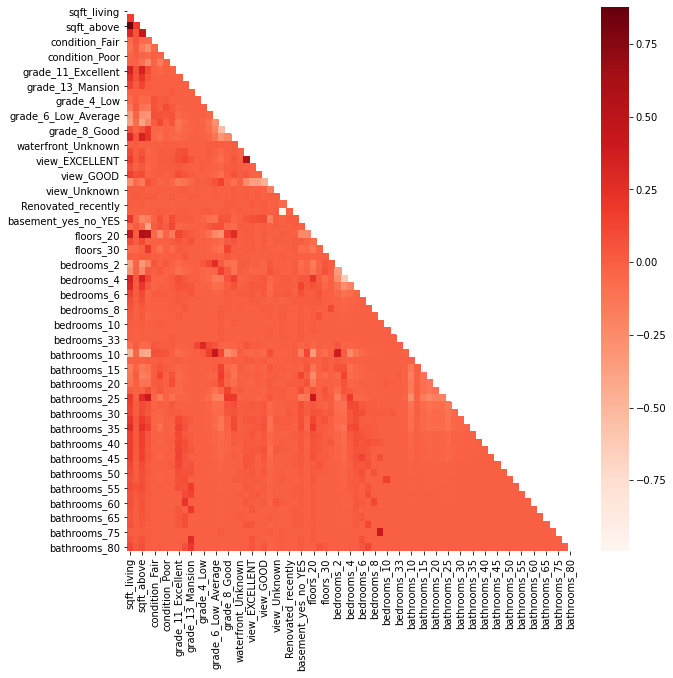

In [28]:
# look for multicollinearity 
# not including price because that is our target variable 
# Functionize & change to a color code that is more intuitive

def multiplot(df_model,figsize=(10,10),cmap="Reds"):
    
    corr = df_model.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr, cmap="Reds",mask=mask)
    return fig, ax


multiplot(df_model.drop('price',axis=1))

In [29]:
# see which predictors have high correlation which each other
# to avoid multicollinearity we need to drop "yr_renovated_ob_unknown", "sqft_above"
# because they are too highly correlated with their pair

df = df_model.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

df.columns = ['corr_coef']

df.drop_duplicates(inplace=True)

df[(df.corr_coef>.75) & (df.corr_coef<1)]

,corr_coef
pairs,
"(Renovated_unknown, not_renovated)",0.993090
"(sqft_living, sqft_above)",0.876448


In [30]:
# remove one var from each highly correlated pair
df_model.drop(['Renovated_unknown',"sqft_above"], axis=1, inplace=True)

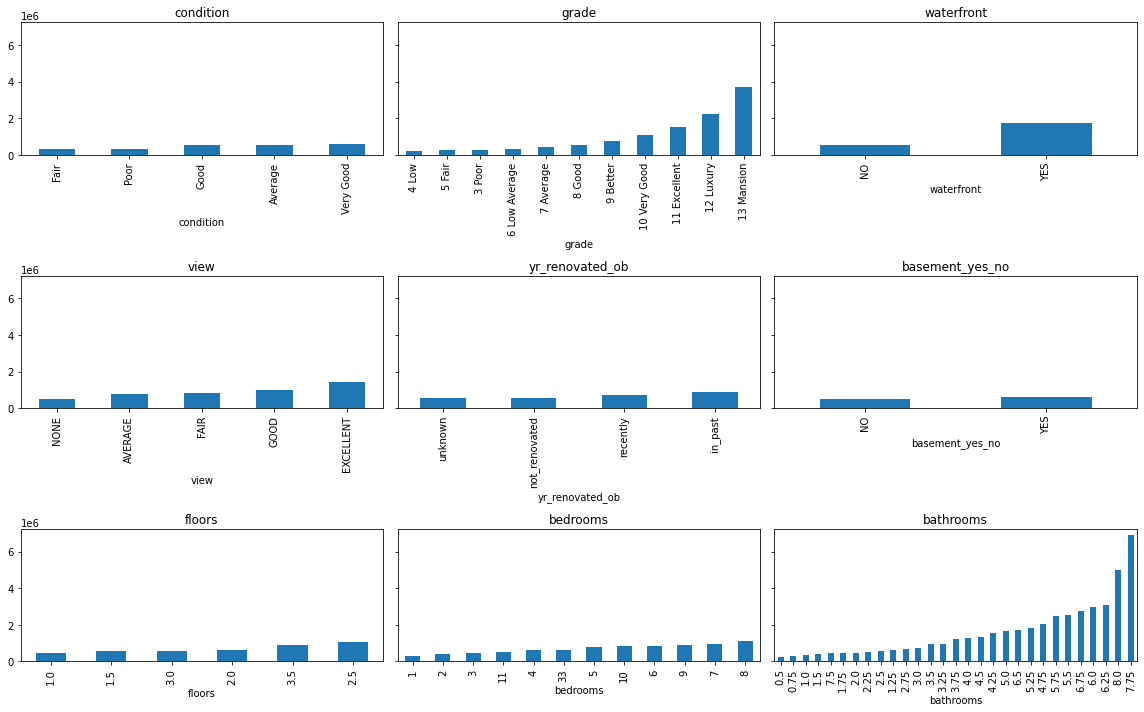

In [31]:
# looks like there might be some correlation between price and grade & price and view & price and bathrooms but the others
# dont seem to have much of a correlation
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,10), sharey=True)

for col, ax in zip(cat_cols, axes.flatten()):
    (data.groupby(col)               # group values together by column of interest
         .mean()['price']            # take the mean of the price for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

# Create Baseline Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     691.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:49:26   Log-Likelihood:            -2.9456e+05
No. Observations:               21597   AIC:                         5.893e+05
Df Residuals:                   21525   BIC:                         5.898e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.357e+06   1.76e+05     36.164      0.000    6.01e+06     6.7e+06
sqft_living           131.9285      3.369     39.161      0.000     125.325     138.532
sqft_lot               -0.2627      0.035     -7.594      0.000      -0.330      -0.195
yr_built            -2960.1347     72.672    -40.733      0.000   -3102.577   -2817.692
condition_Fair      -2.837e+04   1.59e+04     -1.788      0.074   -5.95e+04    2738.460
condition_Good       1.669e+04   3472.415      4.806      0.000    9881.998    2.35e+04
condition_Poor      -3.707e+04   3.81e+04     -0.973      0.331   -1.12e+05    3.76e+04
condition_Very_Good  6.046e+04   5584.642     10.827      0.000    4.95e+04    7.14e+04
grade_11_Excellent   2.288e+05   1.23e+04     18.635      0.000    2.05e+05    2.53e+05
grade_12_Luxury      6.218e+05   2.41e+04     25.821      0.000    5.75e+05    6.69e+05
grade_13_Mansion      1.41e+06   6.45e+04     21.856      0.000    1.28e+06    1.54e+06
grade_3_Poor        -5.528e+05   2.05e+05     -2.692      0.007   -9.55e+05    -1.5e+05
grade_4_Low         -5.458e+05   4.24e+04    -12.859      0.000   -6.29e+05   -4.63e+05
grade_5_Fair        -5.652e+05   1.64e+04    -34.564      0.000   -5.97e+05   -5.33e+05
grade_6_Low_Average -5.143e+05   1.01e+04    -51.095      0.000   -5.34e+05   -4.95e+05
grade_7_Average     -4.178e+05   8335.353    -50.119      0.000   -4.34e+05   -4.01e+05
grade_8_Good        -3.175e+05   7686.358    -41.301      0.000   -3.33e+05   -3.02e+05
grade_9_Better      -1.668e+05   7541.244    -22.121      0.000   -1.82e+05   -1.52e+05
waterfront_Unknown  -1271.4189   4426.585     -0.287      0.774   -9947.854    7405.016
waterfront_YES       5.328e+05   2.07e+04     25.709      0.000    4.92e+05    5.73e+05
view_EXCELLENT       1.846e+05   1.55e+04     11.914      0.000    1.54e+05    2.15e+05
view_FAIR            6.613e+04    1.3e+04      5.085      0.000    4.06e+04    9.16e+04
view_GOOD            5.483e+04   1.12e+04      4.889      0.000    3.28e+04    7.68e+04
view_NONE            -5.19e+04   6918.693     -7.502      0.000   -6.55e+04   -3.83e+04
view_Unknown        -3.962e+04   2.65e+04     -1.494      0.135   -9.16e+04    1.24e+04
not_renovated       -2460.5818   3610.210     -0.682      0.496   -9536.860    4615.697
Renovated_recently  -4.304e+04   5.46e+04     -0.789      0.430    -1.5e+05    6.39e+04
basement_yes_no_YES   2.11e+04   3359.574      6.282      0.000    1.45e+04    2.77e+04
floors_15            1.601e+04   5447.677      2.938      0.003    5327.714    2.67e+04
floors_20            2.795e+04   4379.289      6.381      0.000    1.94e+04    3.65e+04
floors_25            1.283e+05   1.66e+04      7.733      0.000    9.58e+04    1.61e+05
floors_30            1.268e+05   9388.504     13.503      0.000    1.08e+05    1.45e+05
flo

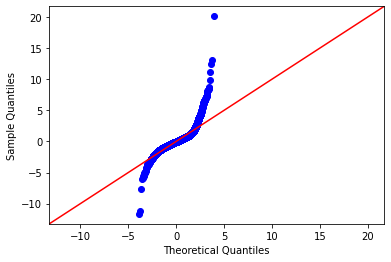

In [32]:
# Baseline model
# not that bad of a R-squared value
# but qqplot looks horrible and probably doesnt meet linear assumptions
# There are a have a few high p values which dont help the model

## Create a string representing the right side of the ~ in our formula
features = ' + '.join(df_model.drop(['price'],axis=1).columns)

## Create the final formula and create the model
f  = "price~"+features

model_1 = smf.ols(f, df_model).fit()
display(model_1.summary())
sm.graphics.qqplot(model_1.resid,line='45',fit=True);

## Further Data Exploration & Scrub for Model 2

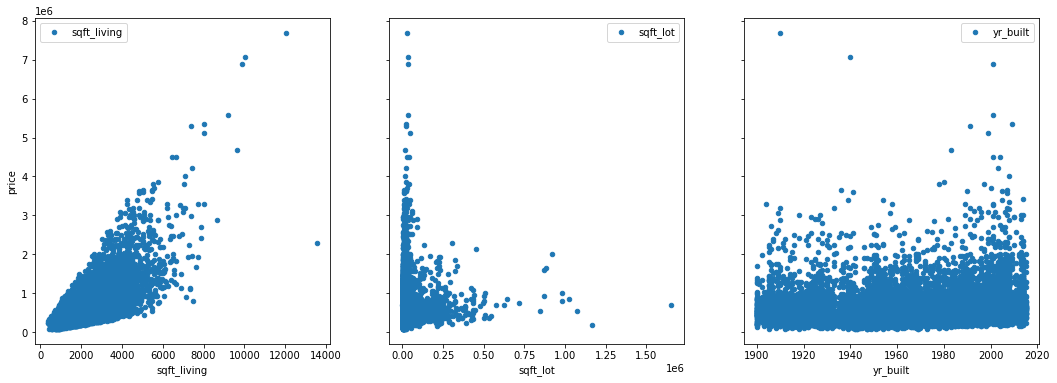

In [33]:
# lets take look at the distribution on the numerical variables  
# we can see we have outliers that need to be dealt with


fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
    
for idx, channel in enumerate(['sqft_living', 'sqft_lot', 'yr_built']):
    df_model.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()
# it looks not all these have linear relationships

In [34]:
# Going to look into outliers and see their possible effect on the model
# First Check for outliers
# there are two ways to check for outliers z-score & IQR methods
from scipy import stats
def find_outliers_z(df_model):
    """Detects outliers using the Z-score>3 cutoff.
    Returns a boolean Series where True=outlier"""
    zFP = np.abs(stats.zscore(df_model))
    zFP = pd.Series(zFP, index=df_model.index)
    z_outliers = zFP > 3
    return z_outliers

def find_outliers_IQR(df_model):
    """Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier"""
    res = df_model.describe()
    q1 = res['25%']
    q3 = res['75%']
    thresh = 1.5*(q3-q1)
    idx_outliers =(df_model < (q1-thresh)) | (df_model > (q3+thresh))
    return idx_outliers

In [35]:
X_outliers_Z = find_outliers_z(df_model['sqft_living'])
X_outliers_Z.sum()

248

In [36]:
# going to go with z score method because it will eliminate less data
X_outliers_IQR = find_outliers_IQR(data['sqft_living'])
X_outliers_IQR.sum()

571

In [37]:
# no outliers
X2_outliers_Z = find_outliers_z(df_model['yr_built'])
X2_outliers_Z.sum()

0

In [38]:
X3_outliers_Z = find_outliers_z(df_model['sqft_lot'])
X3_outliers_Z.sum()

346

In [39]:
y_outliers_Z = find_outliers_z(df_model['price'])
y_outliers_Z.sum()

406

In [40]:
# remove cat outliers
# remove bedroom 6-33 column
data['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [41]:
# nothing looks too crazy here
data['floors'].describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [42]:
# remove bathroom column over 3
data['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [43]:
df_model_outliers = df_model.drop(columns=['bedrooms_33','bedrooms_7', 'bedrooms_8', 'bedrooms_9','bedrooms_10', 'bedrooms_11', 'bathrooms_425', 'bathrooms_45',
       'bathrooms_475', 'bathrooms_50', 'bathrooms_525', 'bathrooms_55',
       'bathrooms_575', 'bathrooms_60', 'bathrooms_625', 'bathrooms_65',
       'bathrooms_675', 'bathrooms_75', 'bathrooms_775', 'bathrooms_80'], axis=1)

In [44]:
# Combine all outleirs to one series
idx_outliers_z = (X_outliers_Z | X2_outliers_Z | X3_outliers_Z | y_outliers_Z)
idx_outliers_z.sum()

840

In [45]:
# make df_clean 
df_clean = df_model_outliers[~idx_outliers_z].copy()
df_clean.describe()

,price,sqft_living,sqft_lot,yr_built,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,...,bathrooms_175,bathrooms_20,bathrooms_225,bathrooms_25,bathrooms_275,bathrooms_30,bathrooms_325,bathrooms_35,bathrooms_375,bathrooms_40
count,2.075700e+04,20757.000000,20757.000000,20757.000000,20757.000000,20757.000000,20757.000000,20757.000000,20757.000000,20757.000000,...,20757.000000,20757.000000,20757.000000,20757.000000,20757.000000,20757.000000,20757.000000,20757.000000,20757.000000,20757.000000
mean,5.018399e+05,2004.051742,10689.859662,1970.625139,0.007708,0.265067,0.001349,0.078431,0.010551,0.001108,...,0.144385,0.091102,0.096594,0.252686,0.054921,0.033531,0.023896,0.030640,0.005299,0.004288
std,2.545812e+05,790.343413,13527.905060,29.349472,0.087460,0.441380,0.036704,0.268856,0.102176,0.033270,...,0.351488,0.287761,0.295411,0.434563,0.227832,0.180022,0.152727,0.172345,0.072606,0.065342
min,7.800000e+04,370.000000,520.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.180000e+05,1410.000000,5000.000000,1951.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.430000e+05,1880.000000,7500.000000,1974.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.240000e+05,2480.000000,10200.000000,1996.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.640000e+06,4820.000000,138085.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# lets scale the cleaned numerical data now so we can make a new model
# we only scale numerical features, dont scale target var

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

num_col = ['sqft_living', 'sqft_lot', 'yr_built']

df_clean_scaled = df_clean.copy()
df_clean_scaled[num_col] = scaler.fit_transform(df_clean[num_col])
df_clean_scaled.describe().round()

,price,sqft_living,sqft_lot,yr_built,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,grade_11_Excellent,grade_12_Luxury,...,bathrooms_175,bathrooms_20,bathrooms_225,bathrooms_25,bathrooms_275,bathrooms_30,bathrooms_325,bathrooms_35,bathrooms_375,bathrooms_40
count,20757.0,20757.0,20757.0,20757.0,20757.0,20757.0,20757.0,20757.0,20757.0,20757.0,...,20757.0,20757.0,20757.0,20757.0,20757.0,20757.0,20757.0,20757.0,20757.0,20757.0
mean,501840.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,254581.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,78000.0,-2.0,-1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,318000.0,-1.0,-0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,443000.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,624000.0,1.0,-0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1640000.0,4.0,9.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     703.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:49:28   Log-Likelihood:            -2.7752e+05
No. Observations:               20757   AIC:                         5.551e+05
Df Residuals:                   20706   BIC:                         5.556e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            8.964e+05   1.97e+04     45.408      0.000    8.58e+05    9.35e+05
sqft_living          7.994e+04   2230.164     35.845      0.000    7.56e+04    8.43e+04
sqft_lot            -8630.9550   1156.355     -7.464      0.000   -1.09e+04   -6364.408
yr_built            -8.053e+04   1675.814    -48.053      0.000   -8.38e+04   -7.72e+04
condition_Fair      -3.566e+04   1.25e+04     -2.854      0.004   -6.01e+04   -1.12e+04
condition_Good        1.44e+04   2700.807      5.333      0.000    9109.429    1.97e+04
condition_Poor      -1.594e+04   2.96e+04     -0.538      0.591    -7.4e+04    4.21e+04
condition_Very_Good  5.073e+04   4350.572     11.661      0.000    4.22e+04    5.93e+04
grade_11_Excellent    1.18e+05   1.18e+04     10.018      0.000    9.49e+04    1.41e+05
grade_12_Luxury      3.014e+05    3.3e+04      9.143      0.000    2.37e+05    3.66e+05
grade_13_Mansion     2.825e-09   4.84e-10      5.836      0.000    1.88e-09    3.77e-09
grade_3_Poor        -5.398e+05   1.57e+05     -3.441      0.001   -8.47e+05   -2.32e+05
grade_4_Low         -5.285e+05   3.25e+04    -16.256      0.000   -5.92e+05   -4.65e+05
grade_5_Fair        -5.361e+05   1.28e+04    -41.734      0.000   -5.61e+05   -5.11e+05
grade_6_Low_Average  -4.82e+05   8036.574    -59.975      0.000   -4.98e+05   -4.66e+05
grade_7_Average     -3.845e+05   6736.788    -57.069      0.000   -3.98e+05   -3.71e+05
grade_8_Good        -2.765e+05   6247.844    -44.252      0.000   -2.89e+05   -2.64e+05
grade_9_Better      -1.225e+05   6184.953    -19.802      0.000   -1.35e+05    -1.1e+05
waterfront_Unknown  -2894.6854   3446.681     -0.840      0.401   -9650.450    3861.079
waterfront_YES       1.414e+05   2.06e+04      6.858      0.000    1.01e+05    1.82e+05
view_EXCELLENT       1.319e+05   1.36e+04      9.695      0.000    1.05e+05    1.59e+05
view_FAIR            2.867e+04   1.04e+04      2.760      0.006    8306.466     4.9e+04
view_GOOD            4.092e+04   9344.564      4.379      0.000    2.26e+04    5.92e+04
view_NONE           -5.694e+04   5551.452    -10.257      0.000   -6.78e+04   -4.61e+04
view_Unknown        -6.168e+04   2.09e+04     -2.948      0.003   -1.03e+05   -2.07e+04
not_renovated       -1658.7991   2808.524     -0.591      0.555   -7163.726    3846.128
Renovated_recently  -1.649e+04   4.17e+04     -0.395      0.693   -9.82e+04    6.52e+04
basement_yes_no_YES  2.394e+04   2634.878      9.084      0.000    1.88e+04    2.91e+04
floors_15            2.339e+04   4249.331      5.503      0.000    1.51e+04    3.17e+04
floors_20            3.023e+04   3475.464      8.699      0.000    2.34e+04     3.7e+04
floors_25            7.703e+04   1.41e+04      5.446      0.000    4.93e+04    1.05e+05
floors_30            1.202e+05   7354.630     16.339      0.000    1.06e+05    1.35e+05
flo

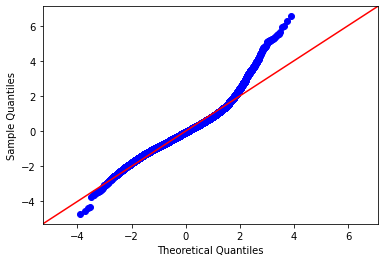

In [47]:
# make a model for df clean scaled

## Create a string representing the right side of the ~ in our formula
features = ' + '.join(df_clean_scaled.drop(['price'],axis=1).columns)


## Create the final formula and create the model
f  = "price~"+features

model_2 = smf.ols(f, df_clean_scaled).fit()
display(model_2.summary())
sm.graphics.qqplot(model_2.resid,line='45',fit=True);

# This had a slight negative effect on the r squared value of the model
# but did much improve the qqplot which is important because the model needs to meet the 
# assumptions of linear regression

# Continue to Scrub & Explore data to get an improved model

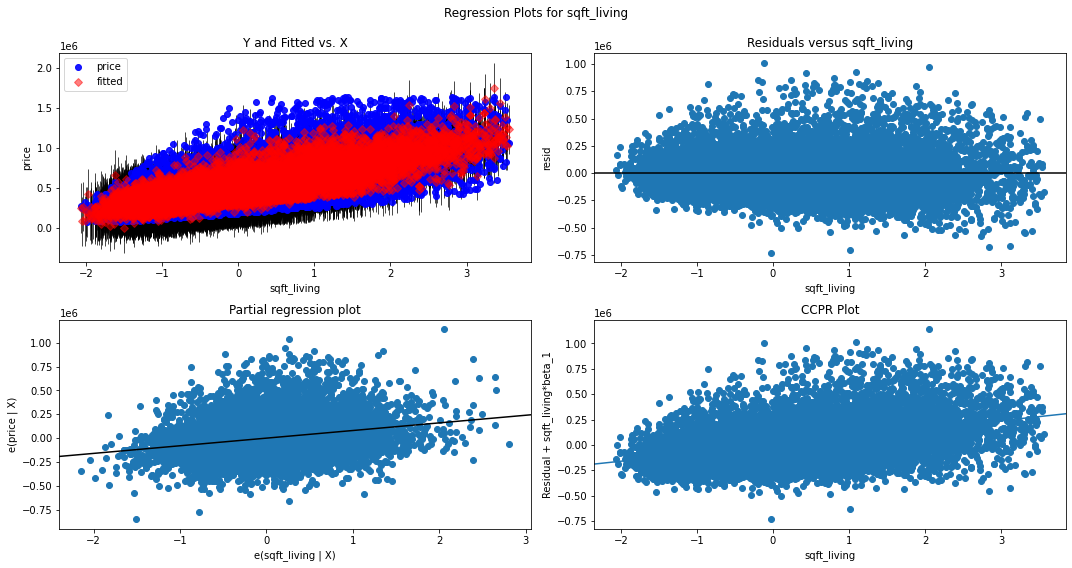

In [48]:
# Lets review each numeric variable to see if it is meeting assumptions of linear regression  
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_2, "sqft_living", fig=fig)
plt.show()
# this looks like it meets the assumptions 

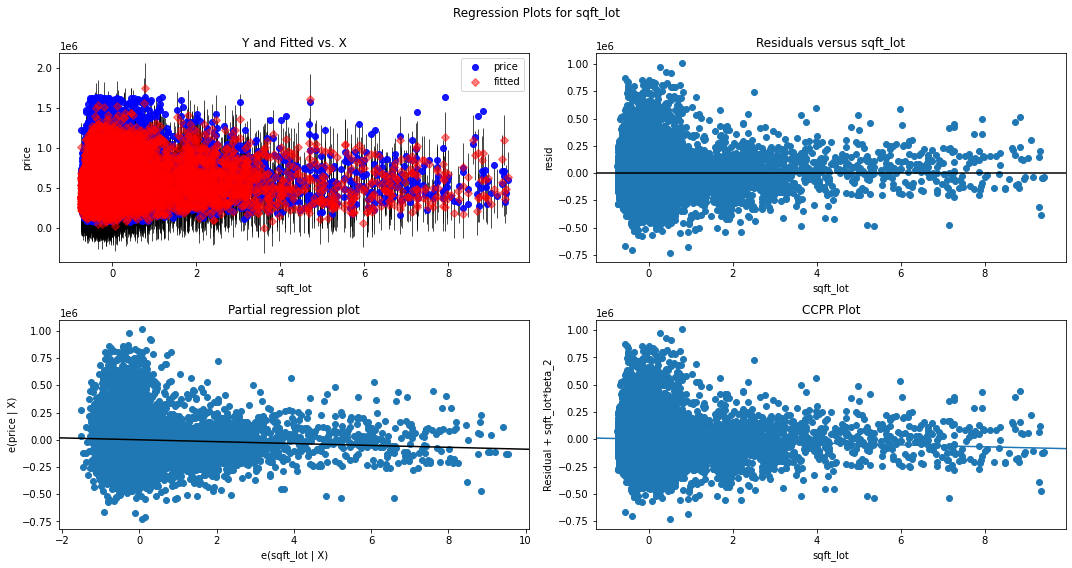

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_2, "sqft_lot", fig=fig)
plt.show()
# this looks like it shows heteroskedasticity and should be removed from the model

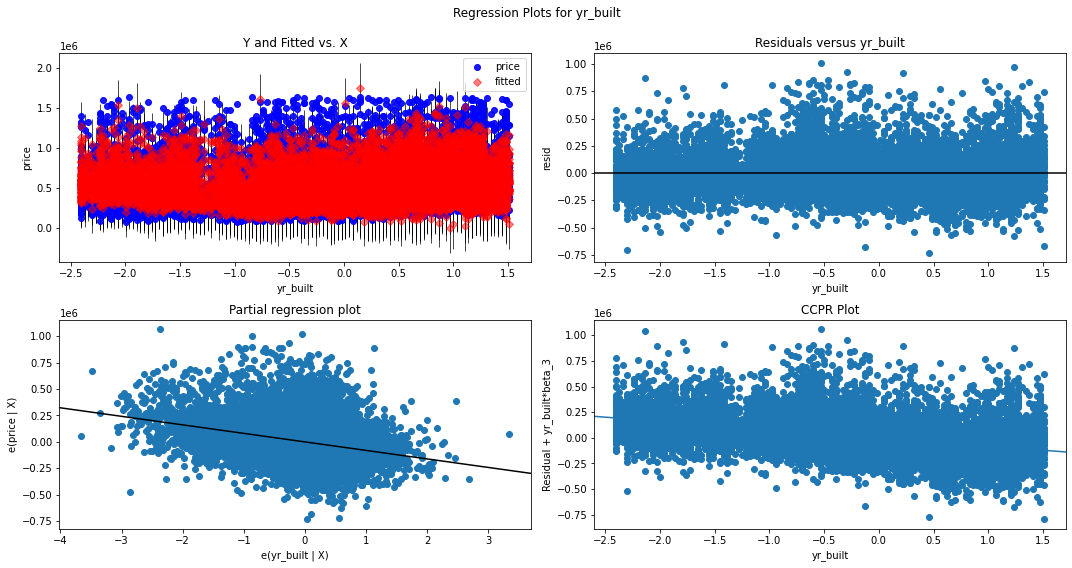

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_2, "yr_built", fig=fig)
plt.show()
# this looks like it meets the assumptions

In [51]:
# review if there are high pvalues
# high pvalues should be removed but when dealing with categorical data all of the category
# or none of the category should be removed
model_2.pvalues[model_2.pvalues > 0.05]

condition_Poor        0.590543
waterfront_Unknown    0.401004
not_renovated         0.554775
Renovated_recently    0.692508
floors_35             0.059342
bedrooms_3            0.597871
bedrooms_4            0.081964
bedrooms_5            0.106798
bathrooms_125         0.985018
bathrooms_325         0.697813
bathrooms_35          0.529245
bathrooms_40          0.252032
dtype: float64

In [52]:
# I am going to drop all the bathroom columns & renovated columns because those have hight pvalues

df_model_3 = df_clean_scaled[['price', 'sqft_living', 'yr_built', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very_Good',
       'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion',
       'grade_3_Poor', 'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average',
       'grade_7_Average', 'grade_8_Good', 'grade_9_Better',
       'waterfront_Unknown', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'view_Unknown','bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'floors_15', 'floors_20',
       'floors_25', 'floors_30', 'floors_35']].copy()
df_model_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20757 entries, 0 to 21596
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                20757 non-null  float64
 1   sqft_living          20757 non-null  float64
 2   yr_built             20757 non-null  float64
 3   condition_Fair       20757 non-null  float64
 4   condition_Good       20757 non-null  float64
 5   condition_Poor       20757 non-null  float64
 6   condition_Very_Good  20757 non-null  float64
 7   grade_11_Excellent   20757 non-null  float64
 8   grade_12_Luxury      20757 non-null  float64
 9   grade_13_Mansion     20757 non-null  float64
 10  grade_3_Poor         20757 non-null  float64
 11  grade_4_Low          20757 non-null  float64
 12  grade_5_Fair         20757 non-null  float64
 13  grade_6_Low_Average  20757 non-null  float64
 14  grade_7_Average      20757 non-null  float64
 15  grade_8_Good         20757 non-null 

In [53]:
# Double check for multicollinearity, use VIF method on numerical variables
# we dont want a VIF value over 5 

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_clean_scaled[['sqft_living', 'yr_built', 'price']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature       VIF
0  sqft_living  1.246423
1     yr_built  1.139258
2        price  1.103225


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1055.
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:49:32   Log-Likelihood:            -2.7779e+05
No. Observations:               20757   AIC:                         5.557e+05
Df Residuals:                   20724   BIC:                         5.559e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            8.574e+05   1.32e+04     64.953      0.000    8.32e+05    8.83e+05
sqft_living          9.341e+04   1975.203     47.290      0.000    8.95e+04    9.73e+04
yr_built            -7.961e+04   1591.798    -50.016      0.000   -8.27e+04   -7.65e+04
condition_Fair      -4.092e+04   1.26e+04     -3.238      0.001   -6.57e+04   -1.62e+04
condition_Good       1.173e+04   2712.580      4.324      0.000    6411.958     1.7e+04
condition_Poor      -2.627e+04      3e+04     -0.876      0.381   -8.51e+04    3.25e+04
condition_Very_Good  5.516e+04   4369.680     12.623      0.000    4.66e+04    6.37e+04
grade_11_Excellent   1.214e+05   1.19e+04     10.228      0.000    9.82e+04    1.45e+05
grade_12_Luxury      2.984e+05   3.33e+04      8.962      0.000    2.33e+05    3.64e+05
grade_13_Mansion    -6.182e-10   6.09e-11    -10.145      0.000   -7.38e-10   -4.99e-10
grade_3_Poor        -5.477e+05   1.58e+05     -3.472      0.001   -8.57e+05   -2.38e+05
grade_4_Low         -5.348e+05   3.17e+04    -16.875      0.000   -5.97e+05   -4.73e+05
grade_5_Fair        -5.454e+05   1.29e+04    -42.117      0.000   -5.71e+05    -5.2e+05
grade_6_Low_Average -4.875e+05   8093.206    -60.233      0.000   -5.03e+05   -4.72e+05
grade_7_Average     -3.834e+05   6724.350    -57.010      0.000   -3.97e+05    -3.7e+05
grade_8_Good        -2.741e+05   6173.471    -44.393      0.000   -2.86e+05   -2.62e+05
grade_9_Better      -1.254e+05   6198.312    -20.228      0.000   -1.38e+05   -1.13e+05
waterfront_Unknown  -2435.8864   3488.750     -0.698      0.485   -9274.111    4402.338
waterfront_YES       1.358e+05   2.08e+04      6.531      0.000     9.5e+04    1.77e+05
view_EXCELLENT        1.33e+05   1.38e+04      9.664      0.000    1.06e+05     1.6e+05
view_FAIR             3.06e+04   1.05e+04      2.910      0.004    9991.071    5.12e+04
view_GOOD            4.209e+04   9456.335      4.451      0.000    2.36e+04    6.06e+04
view_NONE           -6.476e+04   5602.868    -11.558      0.000   -7.57e+04   -5.38e+04
view_Unknown        -6.421e+04   2.12e+04     -3.032      0.002   -1.06e+05   -2.27e+04
bedrooms_2           1.897e+04   1.08e+04      1.759      0.079   -2173.822    4.01e+04
bedrooms_3          -1.323e+04   1.06e+04     -1.245      0.213   -3.41e+04    7598.401
bedrooms_4          -2.561e+04   1.08e+04     -2.367      0.018   -4.68e+04   -4404.540
bedrooms_5          -1.233e+04   1.16e+04     -1.068      0.286    -3.5e+04    1.03e+04
bedrooms_6          -3.997e+04    1.5e+04     -2.671      0.008   -6.93e+04   -1.06e+04
floors_15            1.891e+04   4245.155      4.454      0.000    1.06e+04    2.72e+04
floors_20            2.951e+04   3060.366      9.641      0.000    2.35e+04    3.55e+04
floors_25             9.07e+04   1.42e+04      6.379      0.000    6.28e+04    1.19e+05
flo

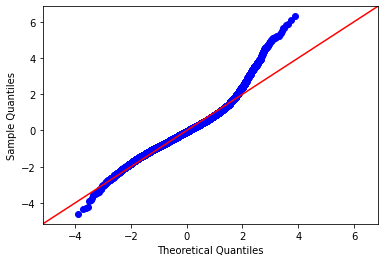

In [54]:
## Create a string representing the right side of the ~ in our formula
features = ' + '.join(df_model_3.drop(['price'],axis=1).columns)

## Create the final formula and create the model
f  = "price~"+features

model_3 = smf.ols(f, df_model_3).fit()
display(model_3.summary())
sm.graphics.qqplot(model_3.resid,line='45',fit=True);

# This did not seem to have a positive effect on the r squared value of the model
# but did improve the qqplot which is important. As well we can be more confident in this model because we eliminated
# the high pvalues

# Continue to scrub & explore data for Final Model

In [55]:
#try dropping bedrooms, waterfront & condition
model_3.pvalues[model_3.pvalues > 0.05]

condition_Poor        0.381150
waterfront_Unknown    0.485053
bedrooms_2            0.078666
bedrooms_3            0.213113
bedrooms_5            0.285658
dtype: float64

In [56]:
# Choosing to remove waterfront & bedroom columns because it looks like they arent helping the model
# removing yr_built because it doesnt seem like it fits as a continious variable

df_model_4 = df_clean_scaled[['price', 'sqft_living', 'yr_built',
       'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion',
       'grade_3_Poor', 'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average',
       'grade_7_Average', 'grade_8_Good', 'grade_9_Better', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'view_Unknown', 'floors_15', 'floors_20',
       'floors_25', 'floors_30', 'floors_35',]].copy()
df_model_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20757 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                20757 non-null  float64
 1   sqft_living          20757 non-null  float64
 2   yr_built             20757 non-null  float64
 3   grade_11_Excellent   20757 non-null  float64
 4   grade_12_Luxury      20757 non-null  float64
 5   grade_13_Mansion     20757 non-null  float64
 6   grade_3_Poor         20757 non-null  float64
 7   grade_4_Low          20757 non-null  float64
 8   grade_5_Fair         20757 non-null  float64
 9   grade_6_Low_Average  20757 non-null  float64
 10  grade_7_Average      20757 non-null  float64
 11  grade_8_Good         20757 non-null  float64
 12  grade_9_Better       20757 non-null  float64
 13  view_EXCELLENT       20757 non-null  float64
 14  view_FAIR            20757 non-null  float64
 15  view_GOOD            20757 non-null 

In [57]:
# rename floor columns to look better
df_model_4.rename(columns={'floors_15': 'floors_1split', 'floors_20': 'floors_2',
                   'floors_25': 'floors_2split', 'floors_30': 'floors_3',
                   'floors_35': 'floors_3split'}, inplace=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     1568.
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:49:32   Log-Likelihood:            -2.7796e+05
No. Observations:               20757   AIC:                         5.560e+05
Df Residuals:                   20735   BIC:                         5.561e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            8.587e+05   8107.314    105.919      0.000    8.43e+05    8.75e+05
sqft_living          8.767e+04   1669.375     52.515      0.000    8.44e+04    9.09e+04
yr_built            -8.535e+04   1532.428    -55.699      0.000   -8.84e+04   -8.24e+04
grade_11_Excellent   1.215e+05    1.2e+04     10.162      0.000     9.8e+04    1.45e+05
grade_12_Luxury      3.052e+05   3.35e+04      9.101      0.000    2.39e+05    3.71e+05
grade_13_Mansion     1.971e-09    4.4e-10      4.483      0.000    1.11e-09    2.83e-09
grade_3_Poor        -5.113e+05   1.59e+05     -3.225      0.001   -8.22e+05   -2.01e+05
grade_4_Low         -5.427e+05   3.15e+04    -17.222      0.000   -6.04e+05   -4.81e+05
grade_5_Fair        -5.451e+05   1.28e+04    -42.506      0.000    -5.7e+05    -5.2e+05
grade_6_Low_Average  -4.88e+05   8063.452    -60.519      0.000   -5.04e+05   -4.72e+05
grade_7_Average     -3.879e+05   6659.134    -58.256      0.000   -4.01e+05   -3.75e+05
grade_8_Good        -2.774e+05   6138.573    -45.185      0.000   -2.89e+05   -2.65e+05
grade_9_Better      -1.275e+05   6214.689    -20.519      0.000    -1.4e+05   -1.15e+05
view_EXCELLENT       1.787e+05   1.23e+04     14.491      0.000    1.55e+05    2.03e+05
view_FAIR            3.002e+04   1.06e+04      2.834      0.005    9256.594    5.08e+04
view_GOOD            4.309e+04   9517.991      4.527      0.000    2.44e+04    6.17e+04
view_NONE           -6.801e+04   5636.469    -12.067      0.000   -7.91e+04    -5.7e+04
view_Unknown        -6.712e+04   2.13e+04     -3.146      0.002   -1.09e+05   -2.53e+04
floors_1split        1.418e+04   4240.752      3.344      0.001    5868.133    2.25e+04
floors_2             2.719e+04   3029.272      8.977      0.000    2.13e+04    3.31e+04
floors_2split        8.631e+04   1.43e+04      6.030      0.000    5.83e+04    1.14e+05
floors_3             1.372e+05   7190.932     19.075      0.000    1.23e+05    1.51e+05
floors_3split        1.368e+05   6.47e+04      2.113      0.035    9876.675    2.64e+05
==============================================================================
Omnibus:                     3090.798   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8684.309
Skew:                           0.805   Prob(JB):                         0.00
Kurtosis:                       5.729   Cond. No.                     2.24e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.6e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

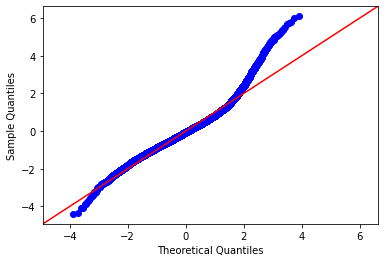

In [58]:
## Create a string representing the right side of the ~ in our formula
features = ' + '.join(df_model_4.drop(['price'],axis=1).columns)

## Create the final formula and create the model
f  = "price~"+features

model_4 = smf.ols(f, df_model_4).fit()
display(model_4.summary())
sm.graphics.qqplot(model_4.resid,line='45',fit=True);

# This did not seem to have a positive effect on the r squared value of the model
# but is still a better model because the high pvalues are removed 


# Interpret Final Model

In [59]:
# man drop differnt cat col
# Test/Train 
# Note: I am choosing to the run test on model 4 since it is the final model. 
from sklearn import metrics

In [60]:
from sklearn.model_selection import (train_test_split, 
                                     cross_val_predict,
                                     cross_validate,
                                     cross_val_score)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
# create df for train and test data by splitting data in df_model_4
df_train, df_test = train_test_split(df_model_4,random_state=42)
df_train.shape,df_test.shape

((15567, 23), (5190, 23))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     1182.
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:49:32   Log-Likelihood:            -2.0855e+05
No. Observations:               15567   AIC:                         4.171e+05
Df Residuals:                   15545   BIC:                         4.173e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            8.634e+05   9334.862     92.488      0.000    8.45e+05    8.82e+05
sqft_living          8.778e+04   1935.144     45.361      0.000     8.4e+04    9.16e+04
yr_built            -8.599e+04   1781.836    -48.259      0.000   -8.95e+04   -8.25e+04
grade_11_Excellent   1.203e+05   1.36e+04      8.830      0.000    9.36e+04    1.47e+05
grade_12_Luxury      2.823e+05   4.17e+04      6.767      0.000    2.01e+05    3.64e+05
grade_13_Mansion     2.434e-10   3.38e-11      7.203      0.000    1.77e-10     3.1e-10
grade_3_Poor        -5.178e+05    1.6e+05     -3.244      0.001   -8.31e+05   -2.05e+05
grade_4_Low         -5.341e+05   3.77e+04    -14.163      0.000   -6.08e+05    -4.6e+05
grade_5_Fair        -5.413e+05   1.49e+04    -36.227      0.000   -5.71e+05   -5.12e+05
grade_6_Low_Average -4.956e+05   9340.525    -53.056      0.000   -5.14e+05   -4.77e+05
grade_7_Average     -3.918e+05   7711.528    -50.806      0.000   -4.07e+05   -3.77e+05
grade_8_Good        -2.813e+05   7104.521    -39.598      0.000   -2.95e+05   -2.67e+05
grade_9_Better      -1.288e+05   7186.189    -17.919      0.000   -1.43e+05   -1.15e+05
view_EXCELLENT       1.943e+05   1.41e+04     13.827      0.000    1.67e+05    2.22e+05
view_FAIR            2.359e+04   1.21e+04      1.942      0.052    -224.220    4.74e+04
view_GOOD            4.485e+04    1.1e+04      4.074      0.000    2.33e+04    6.64e+04
view_NONE           -6.706e+04   6497.858    -10.321      0.000   -7.98e+04   -5.43e+04
view_Unknown        -6.477e+04   2.57e+04     -2.524      0.012   -1.15e+05   -1.45e+04
floors_1split        8497.8160   4919.403      1.727      0.084   -1144.788    1.81e+04
floors_2             2.511e+04   3513.618      7.146      0.000    1.82e+04     3.2e+04
floors_2split        8.939e+04   1.63e+04      5.468      0.000    5.73e+04    1.21e+05
floors_3             1.332e+05   8339.998     15.974      0.000    1.17e+05     1.5e+05
floors_3split        1.226e+05   7.98e+04      1.537      0.124   -3.37e+04    2.79e+05
==============================================================================
Omnibus:                     2349.921   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6694.044
Skew:                           0.811   Prob(JB):                         0.00
Kurtosis:                       5.773   Cond. No.                     4.02e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

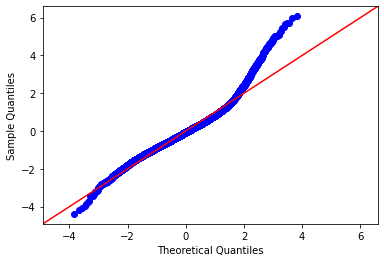

In [63]:
# model train data

## Create a string representing the right side of the ~ in our formula
features = ' + '.join(df_train.drop('price',axis=1).columns)

## Create the final formula and create the model
f  = "price~"+features

model_train = smf.ols(f, df_train).fit()
display(model_train.summary())
sm.graphics.qqplot(model_train.resid,line='45',fit=True);

In [64]:
# scaler.scale_
# take coeff for each and divide but number respectively 

In [65]:
# need to de-scale numberical data for interpertation for sqft_living that would be:
sqft_living_coeff = 87780/790
# take scaled coeffs (87780) and divide by the std (790)
# This is interperted one unit sqft living changes price by $111
# intercept is when everything else at 0
"The coeff for sqft_living is {}.".format(sqft_living_coeff)

'The coeff for sqft_living is 111.11392405063292.'

In [66]:
# need to de-scale numberical data for interpertation for yr_built that would be:
yr_built_coeff = -85990/29.35
# take scaled coeffs (85990) and divide by the std (29.35)
# This is interperted one unit yr_built changes price by $-2,929
"The coeff for yr_built is {}.".format(yr_built_coeff)

'The coeff for yr_built is -2929.8126064735943.'

In [67]:
# run the test bunch of times to make sure the results from a singular test arent random
y = df_model_4['price'].copy()
X = df_model_4.drop('price',axis=1).copy()


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.shape,X_test.shape

((15567, 22), (5190, 22))

In [68]:
# fit the model & get r squared on train data
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train,y_train)

0.6149360826146627

In [69]:
# r squared on test data, we see it is a little lower than train data
reg.score(X_test,y_test)

0.608093593666069

In [70]:
# 10 splits for 10 different tests
results = cross_validate(reg,X_train, y_train,cv=10)
results

{'fit_time': array([0.01309705, 0.00958395, 0.00727868, 0.0067997 , 0.00642014,
        0.00664592, 0.00652814, 0.00773692, 0.00649381, 0.00640488]),
 'score_time': array([0.00241899, 0.00265312, 0.00198817, 0.00210714, 0.00202703,
        0.00199127, 0.00199389, 0.00201321, 0.00202227, 0.00201392]),
 'test_score': array([0.60203603, 0.61767987, 0.60871212, 0.57178877, 0.59051542,
        0.60439783, 0.63460037, 0.63241662, 0.63557972, 0.62745749])}

In [71]:
# this is similar still and this value is close to our train results
# indicating that this model will give a good prediction 

results['test_score'].mean()

0.612518425506469

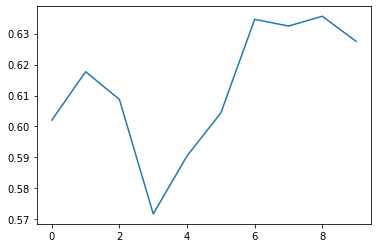

In [72]:
# plot of test results
ax = pd.Series(results['test_score']).plot()

In [73]:
# this is similar still so when we look at all the results from the test & results are similar is suggest 
# the model is not bad 

y_hat_cross = cross_val_predict(reg, X_train, y_train,cv=10)
metrics.r2_score(y_train,y_hat_cross)

0.6135678192763696

In [74]:
# Compute MSE to help with interpretation 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16605 4152 16605 4152


In [76]:
# this means that the algorithm will be off by about $157,360
# There is relatively a small difference between the two values which is what we are looking for. 
# the MSE value tells us how far the data points fall from the regression line  
# These values are very high, might be because the features are scaled but price isnt?
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, model_train.predict(X_train), squared=False)
test_mse = mean_squared_error(y_test, model_train.predict(X_test), squared=False)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 158523.14257613558
Test Mean Squarred Error: 157360.42166401257


In [77]:
df_train.columns

Index(['price', 'sqft_living', 'yr_built', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low',
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'view_Unknown', 'floors_1split', 'floors_2',
       'floors_2split', 'floors_3', 'floors_3split'],
      dtype='object')

In [78]:
# take a look at all the coefficients and see which have the greatest effect
# overall grade, sqft living, and floors seem to have the highest coefs

coeffs = model_train.params.sort_values().to_frame('Coeffs')
coeffs['Abs'] = coeffs['Coeffs'].abs()
coeffs.sort_values('Abs',ascending=False,inplace=True)
coeffs.round(2)

,Coeffs,Abs
Intercept,863361.63,863361.63
grade_5_Fair,-541347.59,541347.59
grade_4_Low,-534136.34,534136.34
grade_3_Poor,-517795.33,517795.33
grade_6_Low_Average,-495571.58,495571.58
grade_7_Average,-391789.64,391789.64
grade_12_Luxury,282335.32,282335.32
grade_8_Good,-281321.38,281321.38
view_EXCELLENT,194311.78,194311.78
floors_3,133220.95,133220.95


/Users/rachelfein/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


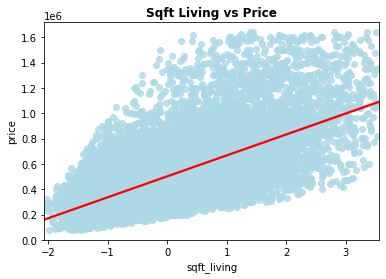

In [79]:
# visualize predictors with strong coef
sns.regplot('sqft_living','price' , data= df_model_4, scatter_kws={"color": "lightblue"}, line_kws={"color": "red"})
ax.set_ylabel('price', fontsize=14)
ax.set_xlabel('sqft living', fontsize=14)
plt.title("Sqft Living vs Price", weight='bold', size=12)
plt.savefig("images/sqft_living.png", dpi=150, bbox_inches = "tight")


<AxesSubplot:ylabel='Count'>

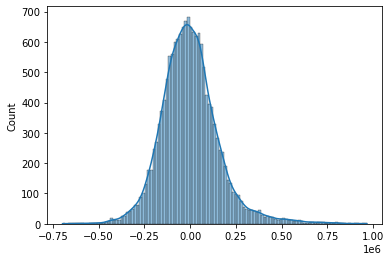

In [80]:
# The data in final model does look pretty normal 
sns.histplot(model_train.resid,kde=True)

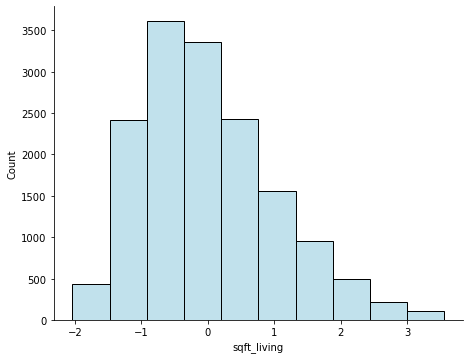

In [81]:
# this could be improved with log transformation in future
sns.displot(data=df_train, x="sqft_living", legend=True, 
            height=5.1, aspect=1.3, color='lightblue', bins=10)

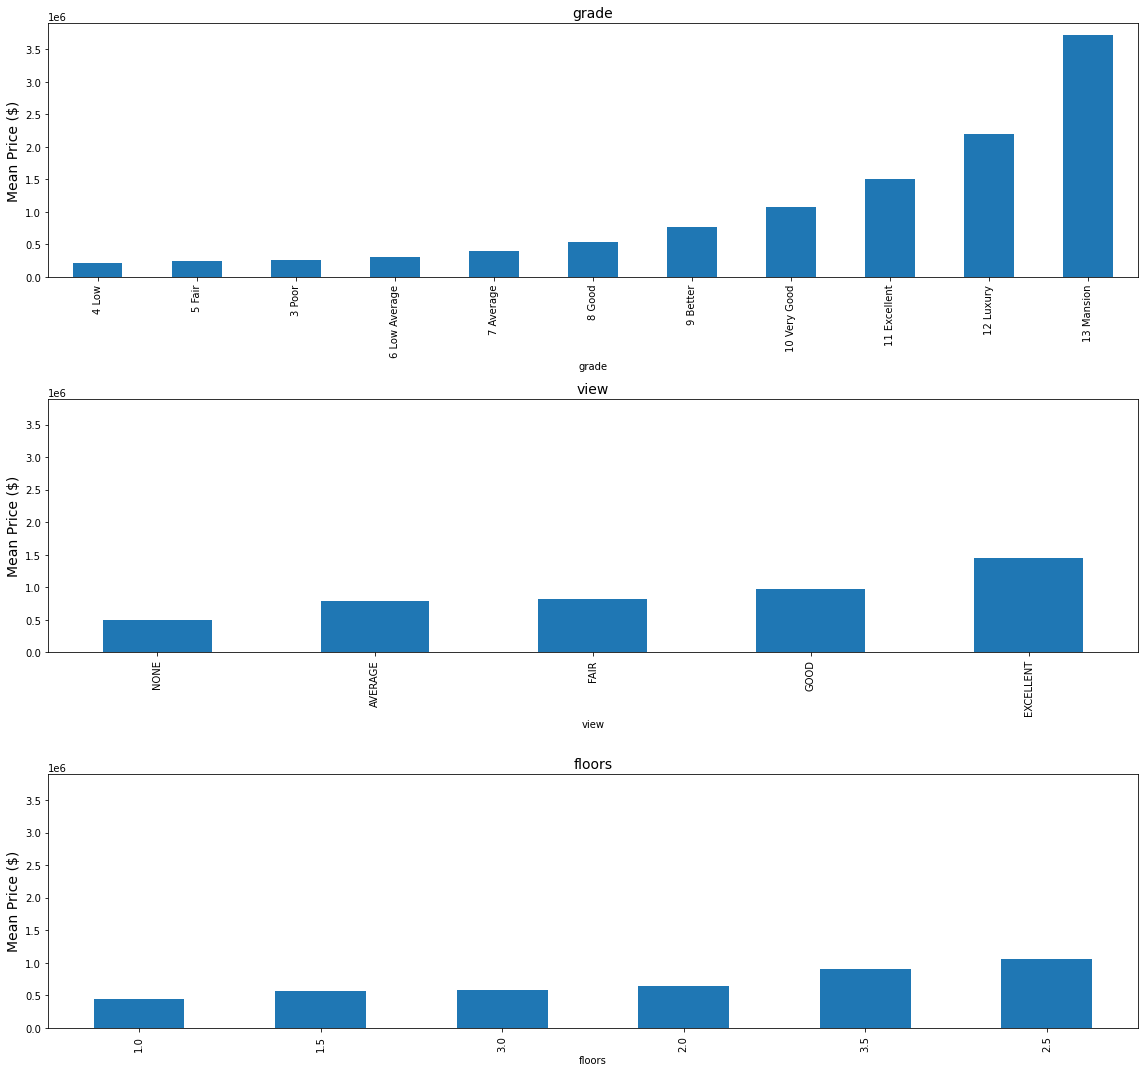

In [82]:
cat_final = ['grade', 'view', 'floors']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,15), sharey=True)

for col, ax in zip(cat_final, axes.flatten()):
    (data.groupby(col)               # group values together by column of interest
         .mean()['price']            # take the mean of the price for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col, fontsize=14)                # Make the title the name of the column
    ax.set_ylabel('Mean Price ($)', fontsize=14)
  
    
fig.tight_layout()

plt.savefig("images/cat_var.png", dpi=150, bbox_inches = "tight")

### Evaluation: Interpretation Explained

The null hypothesis was there is no relationship between the predictor features and 
price (the target variable). The Alternative Hypothesis is there is a relationship between the 
predictor features and price. 

The final model rejects the null hypothesis. All predictor features in the model are statistically significant at alpha level 0.05 which is equivalent for having a 95% confidence interval that the coefficients doesnt include zero & that the parameters are within bounds of the interval.

The final model had an R-square value of 0.615 which can be described as: 61.5% of the variations in the dependent variable 'price' are explained by the independent variables in our model. 

As a final model it should be used with caution for the following reasons:
    
   - the R-squared number could be higher. A higher R squared value represents a precentage of variance explained by the model so a higher R squared value means there is a less chance of error. The remaining percentage (in this model ~ 39%) represents the variance explained by error, the part that the model failed to grasp.
   - There is likely undetected multicollinearity in this model. This is shown in the low eigenvalue and the high Condition Number.
   - There is a standard mean error of ~157,000 
   
The final model is an improved version of the baseline model for the following reasons: 

   - the eliminating multicollinearity using the VIF method & removing correlation above 0.75
   - The data used to interpret the model was significantly more normally distributed than the baseline model
   - Data that was heteroscedastic was removed 
   - Outliers were removed helping the model fit the assumptions of linear regression
   - Columns with high pvalues were removed
 

# Conclusion

The final model is the most competent model. This model has a qqplot that shows it is closest to normality and when trained and tested the model it proved to be a good predictive model.

- The coefficients for the respective grade, view, living sqft, yr built, and floors of the home can be used to adequately adjust the list price, two examples are:
    
   -  The model for 'sqft_living' has a coefficient of 111. This is interpeted by saying each unit of sqft living changes the price by 111 dollars. So taking the known sqft of living space in the house and multipling it by 111 will lead to price estimate to account for the sqft living. For example if a house had 1,500 sqft living, the calculation would be 1,500 x 111 which would tell us to add 166,500 dollars to the price. 
   -  The model for 'view_EXCELLENT' has a coefficient of 178,710. This is a categorical variable and so this is interpeted as if the house has that characteristic then add 178,710 dollars to the price.  

- The final model had an R-square value of 0.615 which can be described as: 61.5% of the variations in the dependent variable 'price' are explained by the independent variables in our model. A higher R squared value means there is a less chance of error. The remaining percentage (in this model ~ 39%) represents the variance explained by error, the part that the model failed to grasp. This R-square value is relatively low and would need to be raised to use the model for its intended purposes.

While this model can be used to help real estate agents come up with a predicted list price for their clients, the model does not have high confidence that the independent variables actually explain the variation in price. This model should be further improved and if it is used in its current state, it should be used with caution 



## Next Steps

For this model feature selection was performed by starting with all possible features and eliminating based on pvalues. A possible way to improve the model could be use a different method of feature selection such as stepwise selection, where we start with no predictors and then add each separately.

In this model we chose to normalize the data by scaling the numerical data. Another way to normalize data is to complete a log transformation, in the future log transformation can be added to this model to see if it leads to any positive effects. 

Deciding how to deal with categorical data can have an effect on a model. In this project we 
filled null data with 'unknown' another method would be filling null data with the most 
represented existing category. It would be a good idea to run another model that moved null
values to a different category (such as the one with the highest count) instead of making
null data a new feature.

I used the Z-Score method to remove outliers in the numeric columns, and for the categorical columns I removed the outliers using my best judgment. Using different methods to decide what outliers to remove can improve the model.

Lastly, in the start of my notebook I choose to dropped 'date', 'sqft_lot15', 'sqft_living15', 'lat', 'long', 'zipcode', 'id', however all these columns did have useful information that could be used with further investigation. 